## Hertz Contact
#### Contact between a sphere and a half-space

An elastic sphere of radius $R$ indents an elastic half-space where total deformation is $d$, causing a contact area of radius[1]

![Alt Text](/Users/lizichen/Master-internship-repo-at-Institut-dAlembert/Week2/figures/Contact_sphere-plane.jpg)

$$
a=\sqrt{R d}
$$


The maximum shear stress occurs in the interior at $z \approx 0.49 a$ for $\nu=0.33$


We want to apply cite Hertz Contact solution for a non-friction Contact between a sphere and a half-space and compare with our FFT solution.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import time

The separation between two surfaces is given by:
$$
h=A x^2+B y^2=\frac{1}{2 R^{\prime}} x^2+\frac{1}{2 R^{\prime \prime}} y^2
$$
In Appendix 2 of *Contact Mechanics*[2], we have:
$$
(A+B)=\frac{1}{2}\left(\frac{1}{R^{\prime}}+\frac{1}{R^{\prime \prime}}\right)=\frac{1}{2}\left(\frac{1}{R_1^{\prime}}+\frac{1}{R_1^{\prime \prime}}+\frac{1}{R_2^{\prime}}+\frac{1}{R_2^{\prime \prime}}\right)
$$
And
$$
\begin{aligned}
(B-A)= & \frac{1}{2}\left\{\left(\frac{1}{R_1^{\prime}}-\frac{1}{R_1^{\prime \prime}}\right)^2+\left(\frac{1}{R_2^{\prime}}-\frac{1}{R_2^{\prime \prime}}\right)^2\right. \\
& \left.+2\left(\frac{1}{R_1^{\prime}}-\frac{1}{R_1^{\prime \prime}}\right)\left(\frac{1}{R_2^{\prime}}-\frac{1}{R_2^{\prime \prime}}\right) \cos 2 \alpha\right\}^{1 / 2}
\end{aligned}
$$

We introduce an equivalent radius $R_{\mathrm{e}}$ defined by

$$
R_{\mathrm{e}}=\left(R^{\prime} R^{\prime \prime}\right)^{1 / 2}=\frac{1}{2}(A B)^{-1 / 2}
$$

In this case the contours of constant separation are circles and identical to those due to a sphere of the same radius $R$ in contact with a plane surface $\left(R_2^{\prime}=R_2^{\prime \prime}=\infty\right)$.




### Contact between a sphere and a half-space


We will consider first the simpler case of solids of revolution $\left(R_1^{\prime}=R_1^{\prime \prime}=R_1 ; R_2^{\prime}=R_2^{\prime \prime}=R_2\right)$. The contact area will be circular, having a radius $a$, say. It is clear that $A=B=\frac{1}{2}\left(1 / R_1+1 / R_2\right)$, here for contact between a sphere and a half-space, $R_2^{\prime}=R_2^{\prime \prime}=\infty$.

$$
\bar{u}_{z 1}+\bar{u}_{z 2}=\delta-(1 / 2 R) r^2
$$

The pressure distribution proposed by Hertz:

$$
p=p_0\left\{1-(r / a)^2\right\}^{1 / 2}
$$

was shown to give normal displacements

$$
\bar{u}_z=\frac{1-\nu^2}{E} \frac{\pi p_0}{4 a}\left(2 a^2-r^2\right), \quad r \leqslant a
$$

The pressure acting on the second body is equal to that on the first, so that by writing

$$
\frac{1}{E^*}=\frac{1-\nu_1^2}{E_1}+\frac{1-\nu_2^2}{E_2}
$$

and $E_1, E_2$ are the elastic moduli and $\nu_1, \nu_2$ the Poisson's ratios associated with each body.

then substituting the expressions for $\bar{u}_{z 1}$ and $\bar{u}_{z 2}$, we get

$$
\frac{\pi p_0}{4 a E^*}\left(2 a^2-r^2\right)=\delta-(1 / 2 R) r^2
$$

from which the radius of the contact circle is given by

$$
a=\pi p_0 R / 2 E^*
$$

The total load(We use F in codes) compressing the solids is related to the pressure by

$$
P=\int_0^a p(r) 2 \pi r \mathrm{~d} r=\frac{2}{3} p_0 \pi a^2
$$

Hence the maximum pressure $p_0$ is $3 / 2$ times the mean pressure $p_{\mathrm{m}}$.

It is convenient to use this total load to rewrite as follow:

$$
\begin{aligned}
& a=\left(\frac{3 P R}{4 E^*}\right)^{1 / 3} \\
& \delta=\frac{a^2}{R}=\left(\frac{9 P^2}{16 R E^{* 2}}\right)^{1 / 3} \\
& p_0=\frac{3 P}{2 \pi a^2}=\left(\frac{6 P E^{* 2}}{\pi^3 R^2}\right)^{1 / 3}
\end{aligned}
$$

In [76]:
# We define the total loading P as F, we give F as input
F = np.linspace(0, 1e3, 1000)


# We define the radius of the elastic sphere as R
R = 1
# We define the elastic modulus of the sphere as E1, and the elastic modulus of the surface as E2
E1 = 1e5
E2 = 1e3
# We define the Poisson ratio of the sphere as v1, and the Poisson ratio of the surface as v2
v1 = 0.33
v2 = 0.33
# We define the reduced elastic modulus as E_star
E_star = 1 / ((1 - v1**2) / E1 + (1 - v2**2) / E2)
# We define the contact radius as a
a = 3*F*R/(4*E_star)

# We define the half-space domain is L^2
L = 2


### First we give our analytical normal displacement solution by Hertz

$$
\bar{u}_z=\frac{1-\nu^2}{E} \frac{\pi p_0}{4 a}\left(2 a^2-r^2\right), \quad r \leqslant a
$$


$$
u_{e x}(r)=h(r)+\frac{a}{\pi R} \sqrt{r^2-a^2}+\frac{r^2-2 a^2}{\pi R} \arccos \left(\frac{a}{r}\right)
$$



total displacement should be given as:

$$
\delta=\frac{a^2}{R}=\left(\frac{9 P^2}{16 R E^{* 2}}\right)^{1 / 3}
$$

In [77]:
#We generate a 2D coordinate space
n = 100
m = 100

x, y = np.meshgrid(np.linspace(0, L, n, endpoint=False), np.linspace(0, L, m, endpoint=False))#notice here that we use endpoint=False to avoid having the last point

# We define the distance from the center of the sphere
r = np.sqrt(x**2 + y**2)

#Here we define p0 as the reference pressure
p0 = (1/np.pi) * (6*F*(E_star**2)/(R**2))**(1/3) #this is the reference pressure



/tmp/ipykernel_314864/244857551.py:5: RuntimeWarning: invalid value encountered in true_divide
  u_z = np.pi*p0*(2*a**2-r**2)/(4*a*E_star)  # analytical displacement field


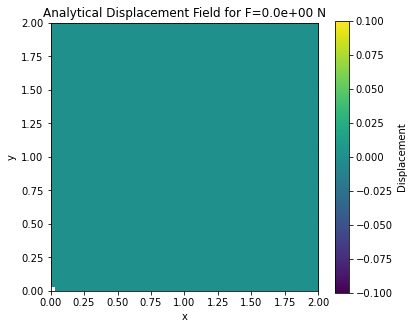

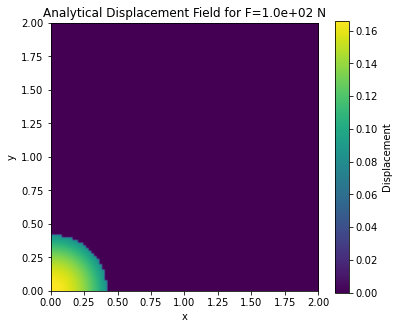

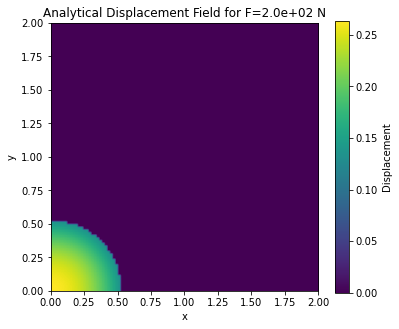

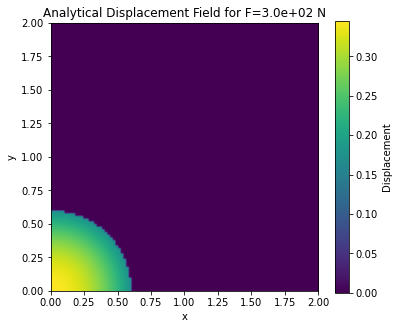

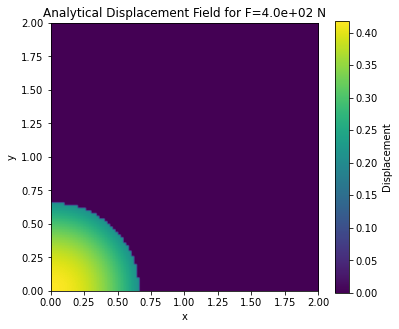

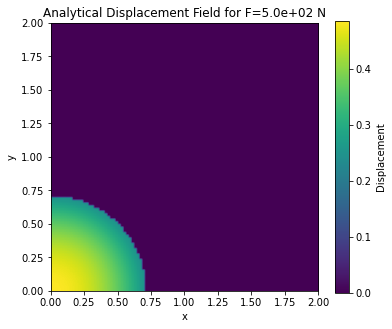

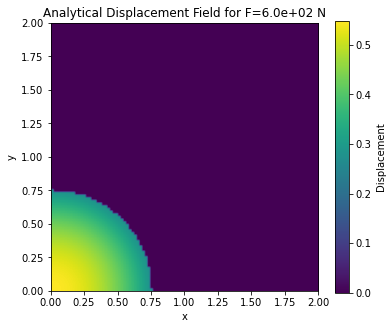

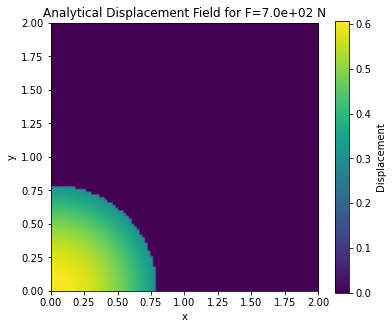

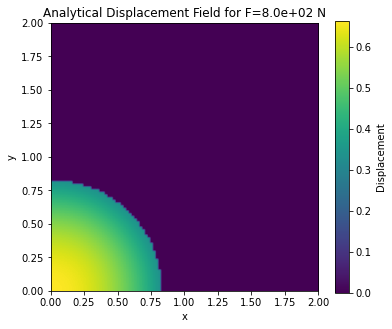

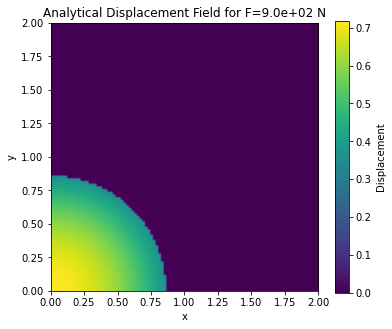

In [78]:
# compute and visualize the displacement field for each F value
for F_value in F[::100]:  # Only plot every 100th value to avoid clutter
    a = (3*F_value*R/(4*E_star))**(1/3)  # contact radius
    p0 = (6*F_value*E_star**2/(np.pi**3*R**2))**(1/3)  # reference pressure
    u_z = np.pi*p0*(2*a**2-r**2)/(4*a*E_star)  # analytical displacement field
    u_z[r > a] =  0 # set the displacement outside the contact area to zero

    # Visualize the displacement field
    plt.figure(figsize=(6, 5))
    plt.imshow(u_z, extent=(0, L, 0, L), origin='lower')
    plt.colorbar(label='Displacement')
    plt.title(f'Analytical Displacement Field for F={F_value:.1e} N')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [79]:
## We define the analytical displacement field

Analytical_displacement = np.pi*p0*(2*a**2-r**2)/(4*E_star*a) #this is the analytical displacement field

Analytical_displacement

array([[ 0.71777898,  0.71757898,  0.71697898, ..., -1.16402102,
        -1.20302102, -1.24242102],
       [ 0.71757898,  0.71737898,  0.71677898, ..., -1.16422102,
        -1.20322102, -1.24262102],
       [ 0.71697898,  0.71677898,  0.71617898, ..., -1.16482102,
        -1.20382102, -1.24322102],
       ...,
       [-1.16402102, -1.16422102, -1.16482102, ..., -3.04582102,
        -3.08482102, -3.12422102],
       [-1.20302102, -1.20322102, -1.20382102, ..., -3.08482102,
        -3.12382102, -3.16322102],
       [-1.24242102, -1.24262102, -1.24322102, ..., -3.12422102,
        -3.16322102, -3.20262102]])

The total deformation $d$ is related to the maximum contact pressure by

$$
d=\left(\frac{9 F^2}{16 E^{* 2} R}\right)^{\frac{1}{3}}
$$

We can compare our (x,y)=(0,0) displacement with this value

In [80]:
d_total_deformation = a**2 / R

d_total_deformation

#d_total_deformation2 = (9 * F**2 / (16 * E_star**2 * R))**(1/3)

#d_total_deformation2

0.7177789779157843

## Q1: we get the analytical displacement distribution

Here we mesh the domain, and give the coordinate of the center of contact zone as (0,0),then $r$ can be given as $ \sqrt{\left(x-x_0\right)^2+\left(y-y_0\right)^2} $.

The distribution of normal pressure in the contact area as a function of distance from the center of the circle is 

$$
p(r)=p_0\left(1-\frac{r^2}{a^2}\right)^{\frac{1}{2}}
$$

where $p_0$ is the maximum contact pressure given by

$$
p_0=\frac{3 F}{2 \pi a^2}=\frac{1}{\pi}\left(\frac{6 F E^{* 2}}{R^2}\right)^{\frac{1}{3}}
$$


0.40716430129324366


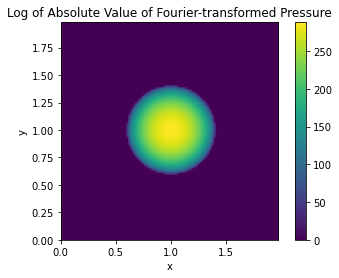

'#Try this figure\npressure_img = plt.imshow(P/p0, extent=[x_min + dx/2, x_max, y_min + dx/2, y_max], \n                            origin=\'lower\', interpolation=\'bicubic\', cmap=plt.cm.inferno, vmax = 1)\nfig.colorbar(pressure_img, ax=ax[0], label=\'Pressure\', orientation="horizontal")\nplt.set_title(\'Pressure Distribution\')\nplt.set_xlabel(\'x\')\nplt.set_ylabel(\'y\')\n'

In [81]:
F_value = 1e2
p0 = (6*F_value*E_star**2/(np.pi**3*R**2))**(1/3)
a = (3*F_value*R/(4*E_star))**(1/3)

'''
#Here we define the pressure distribution
def pressure_distribution(x, y, x0, y0, p0):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    p = p0 * (1 - (r/a)**2)**0.5
    p[r > a] = 0
'''
def pressure_distribution(x, y, x0, y0, a, p0):
    r2 = (x-x0)**2 + (y-y0)**2
    p = np.zeros_like(r2)
    mask = r2 <= a**2
    print(a)
    p[mask] = p0*np.sqrt(1-r2[mask]/a**2)
    return p

# Any benefit of vectorizing the function?



x0 = 1
y0 = 1

#We calculate test pressure on the grid
test_pressure = pressure_distribution(x, y, x0, y0, a, p0)
#We generate the pressure distribution in Fourier space
pressure_fourier = np.fft.fft2(test_pressure, norm='ortho')
# Visualization of the Fourier-transformed pressure
fig, ax = plt.subplots()
extent = [x.min(), x.max(), y.min(), y.max()]
#im = ax.imshow(np.log(np.abs(pressure_fourier)), extent=extent, origin='lower')#not so clear with abs here # That means we take the norm of the complex number
im = ax.imshow(test_pressure, extent=extent, origin='lower')#not so clear with abs here # That means we take the norm of the complex number
plt.colorbar(im, ax=ax)
plt.title('Log of Absolute Value of Fourier-transformed Pressure')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


'''#Try this figure
pressure_img = plt.imshow(P/p0, extent=[x_min + dx/2, x_max, y_min + dx/2, y_max], 
                            origin='lower', interpolation='bicubic', cmap=plt.cm.inferno, vmax = 1)
fig.colorbar(pressure_img, ax=ax[0], label='Pressure', orientation="horizontal")
plt.set_title('Pressure Distribution')
plt.set_xlabel('x')
plt.set_ylabel('y')
'''

## Note, $p(r>a)$ = 0 

We give the displacement by convolution integral:

$$
u(x, y)=\iint \frac{p\left(x^{\prime}, y^{\prime}\right)}{\sqrt{\left(x-x^{\prime}\right)+\left(y-y^{\prime}\right)^2}} \cdot \frac{1}{\pi E^*} d x^{\prime} d y^{\prime}
$$

We take advantage of the property of convolution product:

$$
\mathcal{F}(u)=\mathcal{F}(f) \cdot \mathcal{F}(p)
$$

We define our Kernel function in fourrier domain:

$$
\mathcal{F}(f)=\frac{2}{E^* \sqrt{q_x^2+q_y^2}}
$$

In [82]:
#we define the frequency with q_x and q_y
q_x = 2 * np.pi * np.fft.fftfreq(n, d=L/n)
q_y = 2 * np.pi * np.fft.fftfreq(m, d=L/m)
QX, QY = np.meshgrid(q_x, q_y)

kernel_fourier = np.zeros_like(QX)  # Initialize the kernel array
#non_zero_indices = (QX**2 + QY**2) != 0  # Avoid division by zero
kernel_fourier = 2 / (E_star * np.sqrt(QX**2 + QY**2))
kernel_fourier[0, 0] = 0  # Set the zero frequency component to zero

/tmp/ipykernel_314864/4073800519.py:8: RuntimeWarning: divide by zero encountered in true_divide
  kernel_fourier = 2 / (E_star * np.sqrt(QX**2 + QY**2))


We define our 

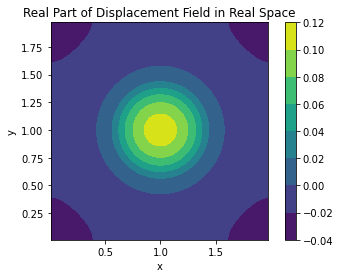

In [83]:
#Calculate the displacement field in fourrier space
displacement_fourrier = pressure_fourier * kernel_fourier

#We calculate the displacement field in real space
displacement_real = np.fft.ifft2(displacement_fourrier, norm='ortho')


# Since displacement_analytical is a large array, we won't print it directly to avoid clutter.
# Instead, let's visualize the real part of the displacement in real space for comparison.
plt.figure()
plt.contourf(np.real(displacement_real), extent=extent, origin='lower')
plt.colorbar()
plt.title('Real Part of Displacement Field in Real Space')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()


We want to compute the displacement for different loading correponds to small contact zone and large contact zone.

![Alt Text](/Users/lizichen/Master-internship-repo-at-Institut-dAlembert/Week2/figures/Hertz_contact_animated.gif)

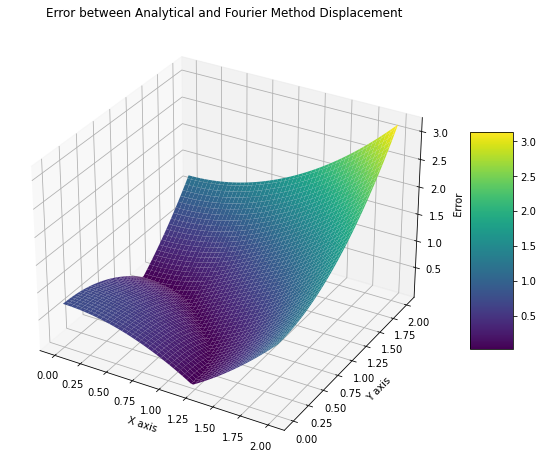

In [84]:
from mpl_toolkits.mplot3d import Axes3D

# Calculate the error between the real part of the displacement obtained through FFT and the analytical solution
error = np.abs(np.real(displacement_real) - Analytical_displacement)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot of the error
X, Y = np.meshgrid(np.linspace(0, L, n), np.linspace(0, L, m))
surf = ax.plot_surface(X, Y, error, cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Error')
ax.set_title('Error between Analytical and Fourier Method Displacement')

plt.show()

##### Reference:

[1] https://en.wikipedia.org/wiki/Contact_mechanics

[2] Johnson, K. L. Contact Mechanics. Cambridge [Cambridgeshire]; New York: Cambridge University Press, 1985.

[3] Rey, Valentine, Guillaume Anciaux, and Jean-François Molinari. ‘Normal Adhesive Contact on Rough Surfaces: Efficient Algorithm for FFT-Based BEM Resolution’. Computational Mechanics 60, no. 1 (July 2017): 69–81. https://doi.org/10.1007/s00466-017-1392-5.